<a href="https://colab.research.google.com/github/skoleti123/Python_AI/blob/main/pca_AIET__phython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Principal Component Analysis :

##PCA reduces the number of features of a data set, while preserving as much information as possible



## IMPORT THE DATA

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#from sklearn import datasets
#iris = datasets.load_iris()
#X = iris['data']
#y = iris['target']
#print(X)
#print(y)
#iris.feature_names
#iris.target_names

dataSet = pd.read_csv(r"https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",header=None)
dataSet02 = pd.DataFrame.to_numpy(dataSet)

labels = np.unique(dataSet02[:,4])


print(dataSet02)
#print(labels)
#print(np.shape(dataSet02))


[[5.1 3.5 1.4 0.2 'Iris-setosa']
 [4.9 3.0 1.4 0.2 'Iris-setosa']
 [4.7 3.2 1.3 0.2 'Iris-setosa']
 [4.6 3.1 1.5 0.2 'Iris-setosa']
 [5.0 3.6 1.4 0.2 'Iris-setosa']
 [5.4 3.9 1.7 0.4 'Iris-setosa']
 [4.6 3.4 1.4 0.3 'Iris-setosa']
 [5.0 3.4 1.5 0.2 'Iris-setosa']
 [4.4 2.9 1.4 0.2 'Iris-setosa']
 [4.9 3.1 1.5 0.1 'Iris-setosa']
 [5.4 3.7 1.5 0.2 'Iris-setosa']
 [4.8 3.4 1.6 0.2 'Iris-setosa']
 [4.8 3.0 1.4 0.1 'Iris-setosa']
 [4.3 3.0 1.1 0.1 'Iris-setosa']
 [5.8 4.0 1.2 0.2 'Iris-setosa']
 [5.7 4.4 1.5 0.4 'Iris-setosa']
 [5.4 3.9 1.3 0.4 'Iris-setosa']
 [5.1 3.5 1.4 0.3 'Iris-setosa']
 [5.7 3.8 1.7 0.3 'Iris-setosa']
 [5.1 3.8 1.5 0.3 'Iris-setosa']
 [5.4 3.4 1.7 0.2 'Iris-setosa']
 [5.1 3.7 1.5 0.4 'Iris-setosa']
 [4.6 3.6 1.0 0.2 'Iris-setosa']
 [5.1 3.3 1.7 0.5 'Iris-setosa']
 [4.8 3.4 1.9 0.2 'Iris-setosa']
 [5.0 3.0 1.6 0.2 'Iris-setosa']
 [5.0 3.4 1.6 0.4 'Iris-setosa']
 [5.2 3.5 1.5 0.2 'Iris-setosa']
 [5.2 3.4 1.4 0.2 'Iris-setosa']
 [4.7 3.2 1.6 0.2 'Iris-setosa']
 [4.8 3.1 

<a href="https://ibb.co/8sJhx0R"><img src="https://i.ibb.co/h9kqdyn/iris.png" alt="iris" border="0"></a>

<a href="https://imgbb.com/"><img src="https://i.ibb.co/mDC1KSt/petal-sepal.png" alt="petal-sepal" border="0"></a>

#PCA without using in-built function

Steps involved \\
(1) Compute the covariance matrix of the data(XX^T) \\
(2) Compute the eigenvalues and eigenvectors of this covariance matrix  \\
(3) Use the eigenvalues and eigenvectors to select only the most important feature vectors and then transform your data onto those vectors for reduced dimensionality!

In [ ]:

import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
X = iris['data']
y = iris['target']
# Compute the mean of the data
mean_vec = np.mean(X, axis=0)

# Compute the covariance matrix
cov_mat = (X - mean_vec).T.dot((X - mean_vec)) / (X.shape[0])


# OR we can do this with one line of numpy:
cov_mat = np.cov(X.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)
print(eig_pairs)

num_features = X.shape[1]
proj_mat = eig_pairs[0][1].reshape(num_features,1)
num_vec_to_keep=2
for eig_vec_idx in range(1, num_vec_to_keep):
  proj_mat = np.hstack((proj_mat, eig_pairs[eig_vec_idx][1].reshape(num_features,1)))

# Project the data
pca_data = X.dot(proj_mat)

print(pca_data)


[(4.228241706034864, array([ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ])), (0.24267074792863386, array([-0.65658877, -0.73016143,  0.17337266,  0.07548102])), (0.07820950004291899, array([-0.58202985,  0.59791083,  0.07623608,  0.54583143])), (0.02383509297345008, array([ 0.31548719, -0.3197231 , -0.47983899,  0.75365743]))]
[[ 2.81823951 -5.64634982]
 [ 2.78822345 -5.14995135]
 [ 2.61337456 -5.18200315]
 [ 2.75702228 -5.0086536 ]
 [ 2.7736486  -5.65370709]
 [ 3.2215055  -6.06828303]
 [ 2.68182738 -5.23749119]
 [ 2.87622016 -5.49033754]
 [ 2.6159824  -4.74864082]
 [ 2.82960933 -5.21317833]
 [ 2.99541804 -5.97202148]
 [ 2.8896099  -5.34168252]
 [ 2.71625587 -5.09184058]
 [ 2.27856139 -4.81555799]
 [ 2.85761474 -6.50571721]
 [ 3.1163261  -6.66501491]
 [ 2.87883726 -6.13763209]
 [ 2.85406843 -5.63880172]
 [ 3.30254481 -6.19979162]
 [ 2.91437873 -5.84051289]
 [ 3.19210892 -5.71829851]
 [ 2.9586599  -5.75994864]
 [ 2.28642572 -5.46042065]
 [ 3.19963195 -5.42566143]
 [ 3.14661108 -5.

## Use in-built function PCA To Find 1 & 2nd Principal Components

In [ ]:
from sklearn.decomposition import PCA

components = PCA(n_components=2).fit_transform(dataSet02[:,:-1])

print(components)

[[-2.68420713  0.32660731]
 [-2.71539062 -0.16955685]
 [-2.88981954 -0.13734561]
 [-2.7464372  -0.31112432]
 [-2.72859298  0.33392456]
 [-2.27989736  0.74778271]
 [-2.82089068 -0.08210451]
 [-2.62648199  0.17040535]
 [-2.88795857 -0.57079803]
 [-2.67384469 -0.1066917 ]
 [-2.50652679  0.65193501]
 [-2.61314272  0.02152063]
 [-2.78743398 -0.22774019]
 [-3.22520045 -0.50327991]
 [-2.64354322  1.1861949 ]
 [-2.38386932  1.34475434]
 [-2.6225262   0.81808967]
 [-2.64832273  0.31913667]
 [-2.19907796  0.87924409]
 [-2.58734619  0.52047364]
 [-2.3105317   0.39786782]
 [-2.54323491  0.44003175]
 [-3.21585769  0.14161557]
 [-2.30312854  0.10552268]
 [-2.35617109 -0.03120959]
 [-2.50791723 -0.13905634]
 [-2.469056    0.13788731]
 [-2.56239095  0.37468456]
 [-2.63982127  0.31929007]
 [-2.63284791 -0.19007583]
 [-2.58846205 -0.19739308]
 [-2.41007734  0.41808001]
 [-2.64763667  0.81998263]
 [-2.59715948  1.10002193]
 [-2.67384469 -0.1066917 ]
 [-2.86699985  0.0771931 ]
 [-2.62522846  0.60680001]
 

##Plot the data using 1st & 2nd Principal Components

['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'gree

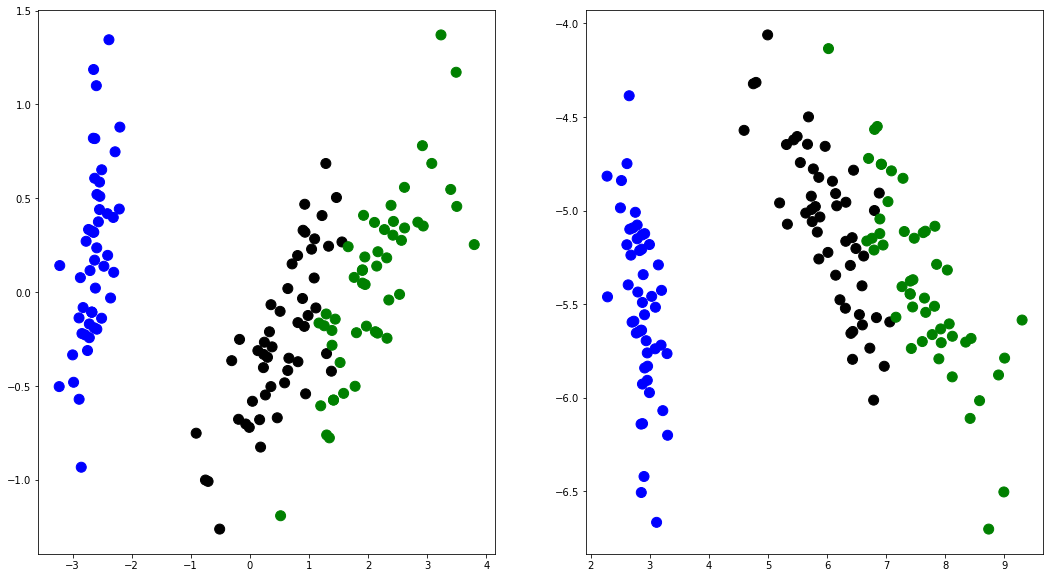

In [ ]:

LABEL_COLOR_MAP = {'Iris-setosa' : 'blue',
                   'Iris-versicolor': 'black',
                   'Iris-virginica':'green'
                  }

label_color = [LABEL_COLOR_MAP[l] for l in dataSet02[:,4]]

fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(121)
ax.scatter(components[:,0],components[:,1], c=label_color, s=100)
#plt.stem(components)

ax = fig.add_subplot(122)
ax.scatter(pca_data[:,0],pca_data[:,1], c=label_color, s=100)
#plt.stem(components)
plt.show()

## Observation:

1. In a lower dimensional subspace the samples are most spread along the new feature axes.
2. Data spread is more along the  1st principal component as compared to second principal component.
3. Cluster separation are not distinct.

#-----------------------------------------------------------------------------------------

###Split data into training and test datasets (training will be based on 70% of data)

In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataSet02[:,:-1], dataSet02[:,4] , test_size=0.3, random_state=0)


print('\n \n There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))


 
 There are 105 samples in the training set and 45 samples in the test set


In [ ]:
#Applying Knn
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 7, p = 2, metric='minkowski')
knn.fit(X_train, y_train)


print('The accuracy of the Knn classifier on test data is {:.2f}'.format(knn.score(X_test, y_test)))

The accuracy of the Knn classifier on test data is 0.98


#--------------------------------------------------------------------------------------------

In [ ]:
from sklearn.model_selection import train_test_split

X_train01, X_test01, y_train01, y_test01 = train_test_split(components, dataSet02[:,4] , test_size=0.3, random_state=0)


print("\n \n There are {} samples in the training set and {} samples in the test set".format(X_train01.shape[0], X_test01.shape[0]))


 
 There are 105 samples in the training set and 45 samples in the test set


In [ ]:
#Applying Knn
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 7, p = 2, metric='minkowski')
knn.fit(X_train01, y_train01)

print('The accuracy of the Knn classifier on test data is {:.2f}'.format(knn.score(X_test01, y_test01)))

The accuracy of the Knn classifier on test data is 0.98
